# Import Packages

In [1]:
# import libraries
import tensorflow
import keras
import cv2
import face_recognition

Using TensorFlow backend.


In [3]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import random
import os
print(os.listdir(r"C:\Users\punit\Desktop\Results"))

[]


# Explore the Data

In [7]:
category_1_dir = os.path.join(r'D:\New folder (2)\Punit Data Science Documents\CNN_assignment-20200702T094027Z-001\CNN_assignment\Dataset\train\category 1')
category_2_dir = os.path.join(r'D:\New folder (2)\Punit Data Science Documents\CNN_assignment-20200702T094027Z-001\CNN_assignment\Dataset\train\category 2')
category_3_dir = os.path.join(r'D:\New folder (2)\Punit Data Science Documents\CNN_assignment-20200702T094027Z-001\CNN_assignment\Dataset\train\category 3')
category_4_dir = os.path.join(r'D:\New folder (2)\Punit Data Science Documents\CNN_assignment-20200702T094027Z-001\CNN_assignment\Dataset\train\category 4')

In [8]:
print('Total training category 1 images:', len(os.listdir(category_1_dir)))
print('Total training category 2 images:', len(os.listdir(category_2_dir)))
print('Total training category 3 images:', len(os.listdir(category_3_dir)))
print('Total training category 4 images:', len(os.listdir(category_4_dir)))

category_1_files = os.listdir(category_1_dir)
print(category_1_files[:10])

category_2_files = os.listdir(category_2_dir)
print(category_2_files[:10])

category_3_files = os.listdir(category_3_dir)
print(category_3_files[:10])

category_4_files = os.listdir(category_4_dir)
print(category_4_files[:10])

Total training category 1 images: 102
Total training category 2 images: 107
Total training category 3 images: 112
Total training category 4 images: 119
['category 1_original_1000.png_01b3b4fc-dabe-457d-9159-3c2e7eb77785.png', 'category 1_original_1000.png_3a0711db-3523-4e09-9df3-8c847410f703.png', 'category 1_original_1000.png_a8cd0fef-8f45-471b-b4e1-02f76729b6df.png', 'category 1_original_1000.png_c61d4db4-cff4-444a-bb16-4b562979675c.png', 'category 1_original_1000.png_c89211f0-607b-4454-9f0f-dc31584db133.png', 'category 1_original_1010.png_0a92c75d-e7bb-4973-9efd-8f0a297701fd.png', 'category 1_original_1010.png_4d56d3fe-2c2e-4b9c-abd4-3074c0381ea7.png', 'category 1_original_1011.png_02aa621b-3cde-4ff0-ab16-d80c9ed5226d.png', 'category 1_original_1011.png_09ee2c6b-6853-4938-ab95-760e6d137a77.png', 'category 1_original_1011.png_4172b2d5-adde-4f10-bcc3-93eb8779bd61.png']
['category 2_original_6000.png_0fedf894-fc62-4e7b-b1ba-1752a2a246ae.png', 'category 2_original_6000.png_7483dc02-19a8

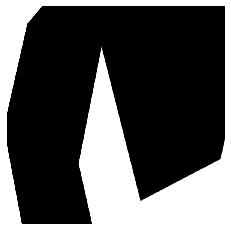

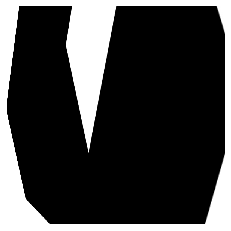

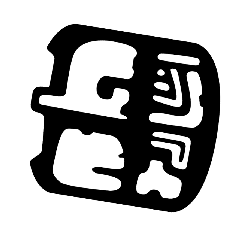

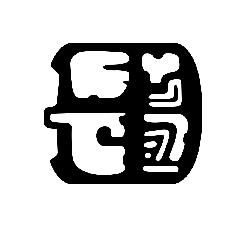

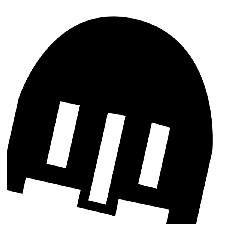

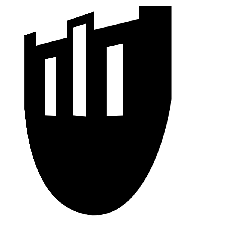

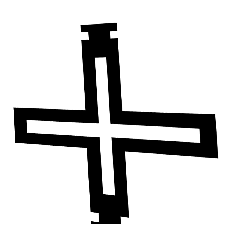

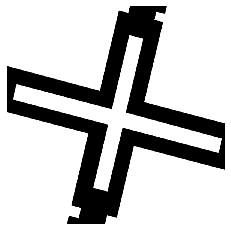

In [9]:
pic_index = 2

next_category_1 = [os.path.join(category_1_dir, fname) 
                for fname in category_1_files[pic_index-2:pic_index]]

next_category_2 = [os.path.join(category_2_dir, fname) 
                for fname in category_2_files[pic_index-2:pic_index]]

next_category_3 = [os.path.join(category_3_dir, fname) 
                for fname in category_3_files[pic_index-2:pic_index]]

next_category_4 = [os.path.join(category_4_dir, fname) 
                for fname in category_4_files[pic_index-2:pic_index]]


for i, img_path in enumerate(next_category_1+next_category_2+next_category_3+next_category_4):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

# Data Preprocessing

In [107]:
TRAINING_DIR = r"D:\New folder (2)\Punit Data Science Documents\CNN_assignment-20200702T094027Z-001\CNN_assignment\Dataset\train"

VALIDATION_DIR = r"D:\New folder (2)\Punit Data Science Documents\CNN_assignment-20200702T094027Z-001\CNN_assignment\Dataset\train"


Found 310 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


In [108]:
datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
validation_split=0.3)


train_generator= datagen.flow_from_directory(
TRAINING_DIR,
target_size= (150,150),
batch_size=16,
subset="training",
class_mode= 'categorical') ## for 2 classes give it as binary


val_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(150,150),
batch_size=16,
subset="validation",
class_mode='categorical')

Found 310 images belonging to 4 classes.
Found 130 images belonging to 4 classes.


# Building Model

In [121]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.3))

## fully connected layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(120,activation='relu'))
model.add(Dropout(0.4))


model.add(Dense(4,activation='softmax'))

In [122]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)       

In [123]:
model.compile(loss='categorical_crossentropy', ##binary_crossentropy
             optimizer= 'adam', ##adamax
             metrics=['categorical_accuracy'])

# Training

In [124]:
from tensorflow.keras.callbacks import *
early_stop = EarlyStopping(monitor='val_loss',patience=50,mode='auto',restore_best_weights=True)
callbacks= [early_stop]

In [134]:
history = model.fit_generator(
train_generator,
steps_per_epoch=10,
epochs=10,
callbacks=callbacks,
validation_data=validation_generator,
validation_steps=10)

Epoch 1/10
10/10 [==============================] - 11s 1s/step - loss: 0.4373 - categorical_accuracy: 0.8400 - val_loss: 12.1319 - val_categorical_accuracy: 0.2260
Epoch 2/10
10/10 [==============================] - 10s 975ms/step - loss: 0.4077 - categorical_accuracy: 0.8562 - val_loss: 10.5475 - val_categorical_accuracy: 0.2260
Epoch 3/10
10/10 [==============================] - 10s 1s/step - loss: 0.1991 - categorical_accuracy: 0.9438 - val_loss: 11.5453 - val_categorical_accuracy: 0.2329
Epoch 4/10
10/10 [==============================] - 10s 998ms/step - loss: 0.3676 - categorical_accuracy: 0.8867 - val_loss: 10.0330 - val_categorical_accuracy: 0.2466
Epoch 5/10
10/10 [==============================] - 10s 983ms/step - loss: 0.5605 - categorical_accuracy: 0.8375 - val_loss: 12.2542 - val_categorical_accuracy: 0.2260
Epoch 6/10
10/10 [==============================] - 11s 1s/step - loss: 0.3208 - categorical_accuracy: 0.8800 - val_loss: 12.2800 - val_categorical_accuracy: 0.2329
E

# Evaluating Accuracy and Loss for the Model

In [130]:
import pandas as pd
model_losses = pd.DataFrame(model.history.history)
model_losses.head()

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,4.038049,0.260000,1.401114,0.260274
1,2.854712,0.387500,1.846628,0.287671
2,1.861712,0.462500,2.706462,0.280822
3,1.550865,0.493333,3.507286,0.267123
4,1.139187,0.586667,5.024166,0.260274


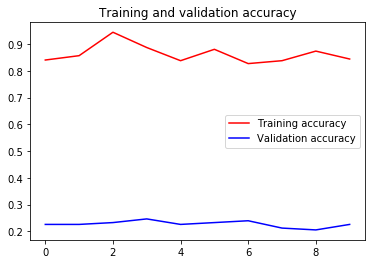

<Figure size 432x288 with 0 Axes>

In [136]:
cat_accuracy = history.history['categorical_accuracy']
val_cat_accuracy = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(cat_accuracy))

plt.plot(epochs, cat_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_cat_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

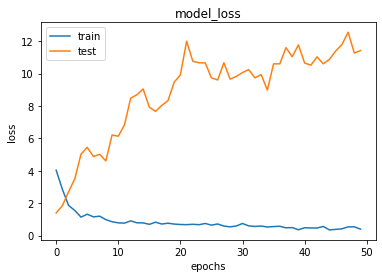

In [137]:
plt.plot(model_losses['loss'])
plt.plot(model_losses['val_loss'])
plt.title('model_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc= 'upper left')
plt.show()

# Running the Model

In [142]:
images = []
img_folder = os.path.join(r"C:\Users\punit\Desktop\Results\Valid")
img_files = os.listdir(img_folder)
img_files = [os.path.join(img_folder, f) for f in img_files]
# print(img_files)
for img in img_files:
    img = load_img(img, target_size=(150, 150))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
# print(images)
classes = model.predict_classes(images, batch_size=10)
print(classes)

[1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3]


# Visualizing Intermediate Representations

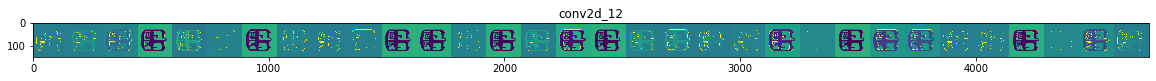

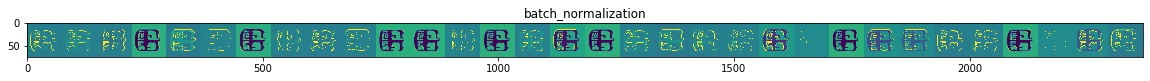

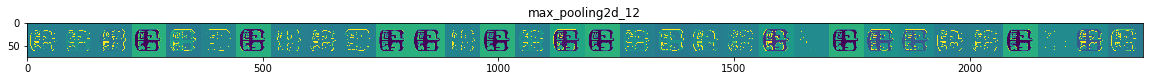

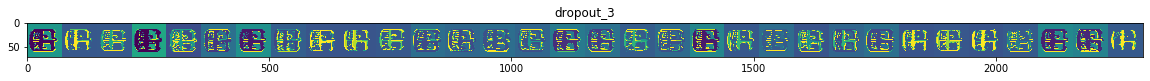

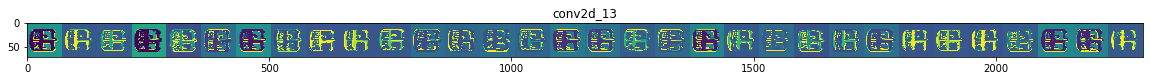

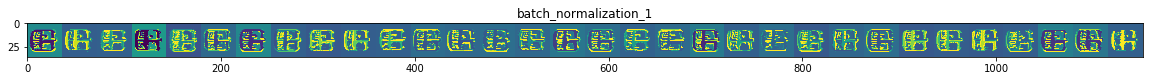

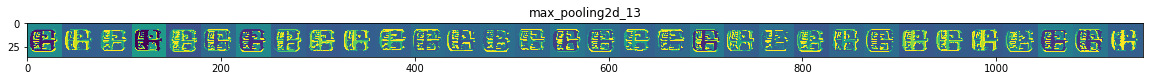

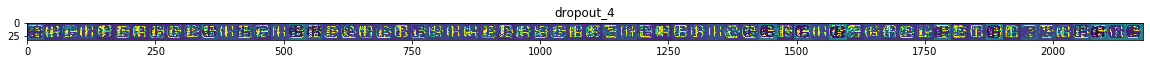

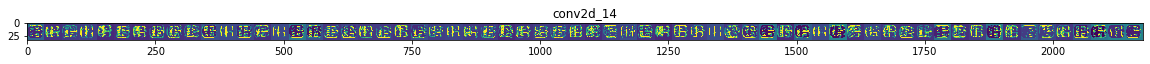

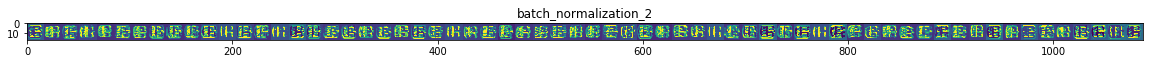

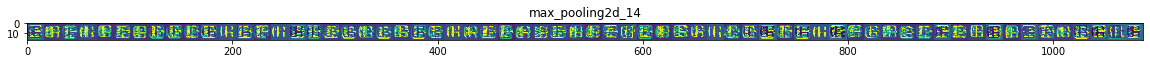

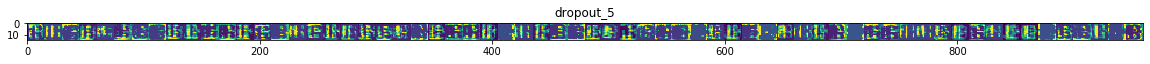

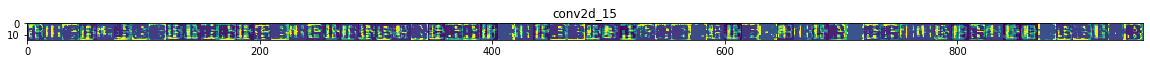

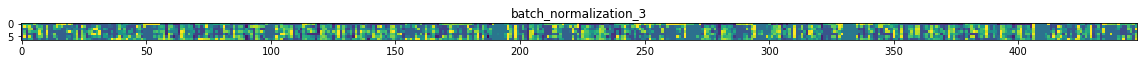

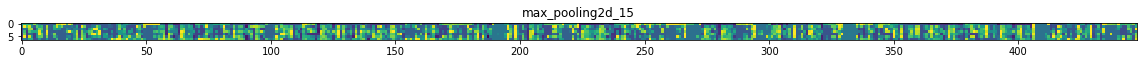

In [144]:
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a rock,paper or scissors from the training set.
category_1_img_files = [os.path.join(category_1_dir, f) for f in category_1_files]
category_2_img_files = [os.path.join(category_2_dir, f) for f in category_2_files]
category_3_img_files = [os.path.join(category_3_dir, f) for f in category_3_files]
category_4_img_files = [os.path.join(category_4_dir, f) for f in category_4_files]

img_path = random.choice(category_1_img_files + category_2_img_files+category_3_img_files+category_4_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
        x  = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std ()
        x *=  64
        x += 128
        x  = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )